# _Dataquest: The Weighted Mean and The Median_

This notebook was adapted from Dataquest's lesson _The Weighted Mean And The Median_ within their probability and statistics chapter. 

In [2]:
# load in data
import pandas as pd

# read in Ames housing txt file
houses = pd.read_csv('data/AmesHousing_1.txt', sep = '\t')

houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [15]:
# code below generates the summary table used by Dataquest for the first excercise
houses_per_year = houses.groupby('Yr Sold', as_index=False).agg({'SalePrice': 'mean',
                                                               'Sale Condition': 'count'})
houses_per_year.columns = ['Year', 'Mean Price', 'Houses Sold']
houses_per_year['Year'] = summary_table['Year'].astype('category')

In [17]:
# compute the mean price in houses_per_year
mean_new = houses_per_year['Mean Price'].mean()

# compute the mean of the SalePrice column in houses data set
mean_original = houses['SalePrice'].mean()

# get difference between two means
difference = mean_original - mean_new

print(difference)

847.3055805878539


## _Different Weights_

- counterintuitively, in previous exercise the two means were not equal to each other
    - root issue: different number of houses sold each year
    - means that prices for each individual year weights differently in the overal mean
- to compute the correct overall mean, we need to:
    - find sum of prices for each year individually
    - add all the sums together
    - Divide the funal sum by the number of houses sold (not the number of years) to find the mean sale price

In [21]:
# compute sum of prices for each year
houses_per_year['sum'] = houses_per_year['Mean Price'] * houses_per_year['Houses Sold']

# check out the new columns
houses_per_year

,Year,Mean Price,Houses Sold,sum
0,2006,181761.648000,625,113601030.0
1,2007,185138.207493,694,128485916.0
2,2008,178841.750804,622,111239569.0
3,2009,181404.567901,648,117550160.0
4,2010,172597.598240,341,58855781.0


In [27]:
# add all the sums together
sums_together = houses_per_year['sum'].sum()

# gather the sum of the Houses Sold column
houses_sold = houses_per_year['Houses Sold'].sum()

# compute the weighted mean
weighted_mean = round(sums_together / houses_sold, 10)

# compute the mean of the SalePrice column in houses
mean_original = round(houses['SalePrice'].mean(), 10)

# get the difference between the original mean and the weighted mean
difference = weighted_mean - mean_original

print(difference)

0.0


## _The Weighted Mean_

- what we did above was compute the weighted mean
- weighted mean = sum of (value multiplied by its corresponding weight) divivded by the summations of all the weights

In [28]:
import numpy as np

# define a function that computes the weighted mean for any array of numbers
def weighted_mean(mean_values, weights):
    '''
    Function that takes two arrays - one containing the mean values and the other the corresponding weights 
    and then computes/returns the weighted mean 
    '''
    # calculate the total for each value by multiplying it by its weight
    values_sum = mean_values * weights
    
    # add all the sums together
    sums_together = np.sum(values_sum)
    
    # gather the sum of all the weights
    weights_together = np.sum(weights)
    
    # calculate weighted mean
    weighted_mean = round(sums_together / weights_together, 10)
    
    return weighted_mean

In [31]:
# use the function from above to compute the weighted mean for the Mean Price column in houses_per year
weighted_mean_function = weighted_mean(houses_per_year['Mean Price'], houses_per_year['Houses Sold'])

In [33]:
# use the np.average function to compute the weighted mean for the Mean Price column
weighted_mean_numpy = round(np.average(houses_per_year['Mean Price'], weights=houses_per_year['Houses Sold']), 10)

In [35]:
# check to see if the two weighted means are the same
equal = weighted_mean_function == weighted_mean_numpy

True

## _The Median for Open-ended Distributions_

- there are distributions where it's impossible to comute the mean (see example below)

In [36]:
print(houses['TotRms AbvGrd'].value_counts())

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64


- lowest boundary of distribution is well-defined (i.e. _2_)
- highest values is not clearly defined (i.e. _10 or more_)
    - we say this variable has an open-ended distribution
- common workaround to calculating mean in situation like this:
    - sort all values in distribution in ascending order
    - then select middle value as the most representative value of the distribution

In [49]:
# generate different distributions for exercise
distribution1 = [23, 24, 22, '20 years or lower,', 23, 42, 35]
distribution2 = [55, 38, 123, 40, 71]
distribution3 = [45, 22, 7, '5 books or lower', 32, 65, '100 books or more']

# get medians of the above distributions
median1 = sorted(distribution1, key=lambda x: str(x))[3]
median2 = np.median(distribution2)
median3 = 32

## _Distributions with Even Number of Values_

- sorted distribution with 6 values, impossible to choose value that divides in two halves
- workaround: take two middle values amd compute their mean

In [54]:
# find the median value of the TotRms AbvGrd column
totrms = houses['TotRms AbvGrd'].copy()

# first, replace the '10 or more' value with the integer 10
totrms = totrms.replace('10 or more', 10)

# convert the column to the int type
totrms = totrms.astype(int)

# get the median of totrms
median = np.median(totrms)

## _The Median as a Resistant Statistic_

- when we compute the median, we don't consider equally each value in distribution
    - only consider the middle value (or middle two in case even number of values)
- the mean can change, but the median can stay the same
    - median is resistant to changes in data (i.e. a robust statistic)
    - property makes median ideal for distributions containing outliers

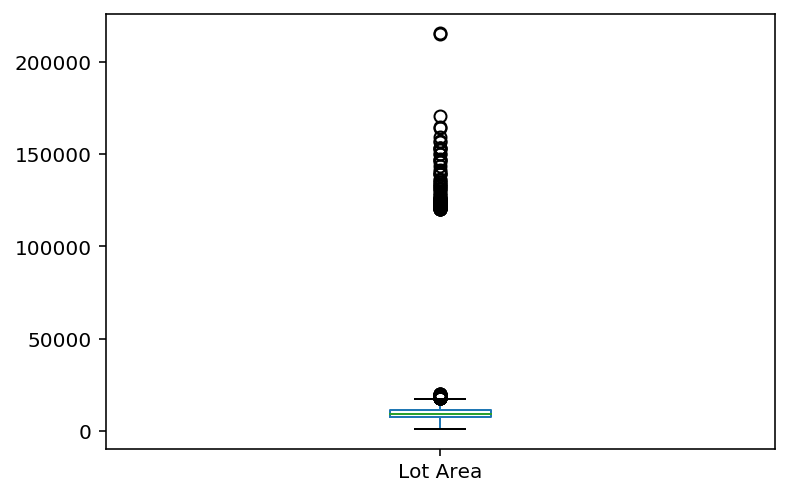

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# visualize the distributions of Lot Area and SalePrice with a box plot
houses['Lot Area'].plot.box();

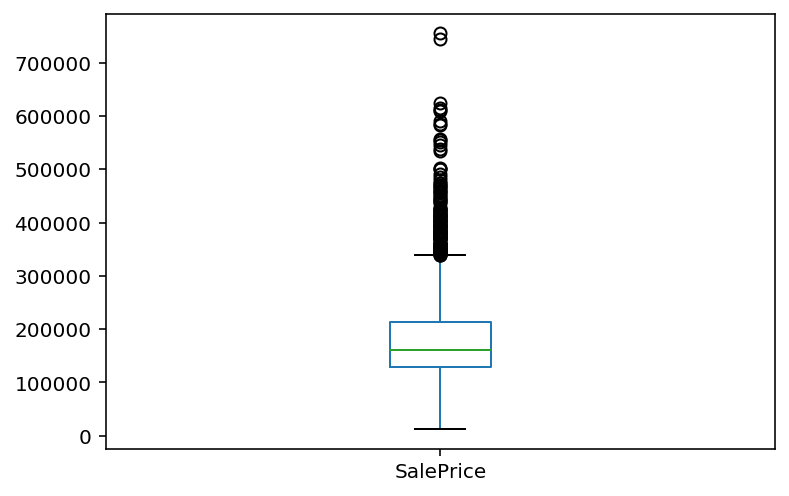

In [59]:
houses['SalePrice'].plot.box();

In [62]:
# compute the median and mean for the Lot Area variable
lot_median, lot_mean = np.median(houses['Lot Area']), np.mean(houses['Lot Area'])

# compute the median and mean for the SalePrice
price_median, price_mean = np.median(houses['SalePrice']), np.mean(houses['SalePrice'])

# what is the difference between median and mean of Lot Area?
lotarea_difference = lot_mean - lot_median

# what is the difference between median and mean of SalePrice?
saleprice_difference = price_mean - price_median

print(lotarea_difference, saleprice_difference)

3680.7051194539254 20796.060068259394


## _The Median for Ordinal Scales_

- consider the frequency distribution of the `Overall Cond` variable, which rates the overall condition of a house

In [63]:
print(houses['Overall Cond'].value_counts().sort_index())

1       7
2      10
3      50
4     101
5    1654
6     533
7     390
8     144
9      41
Name: Overall Cond, dtype: int64


- each of these numerical values corresponds to a specific quality level
    - 1 = 'very poor' while 10 = 'very excellent'
- remember: difference between two points on an ordinal scale can only tell us the directions of the difference, but not the size of the difference

In [66]:
# find the mean of the Overall Cond variable
mean = houses['Overall Cond'].mean()

# find the median of the Overall Cond variable
median = houses['Overall Cond'].median()

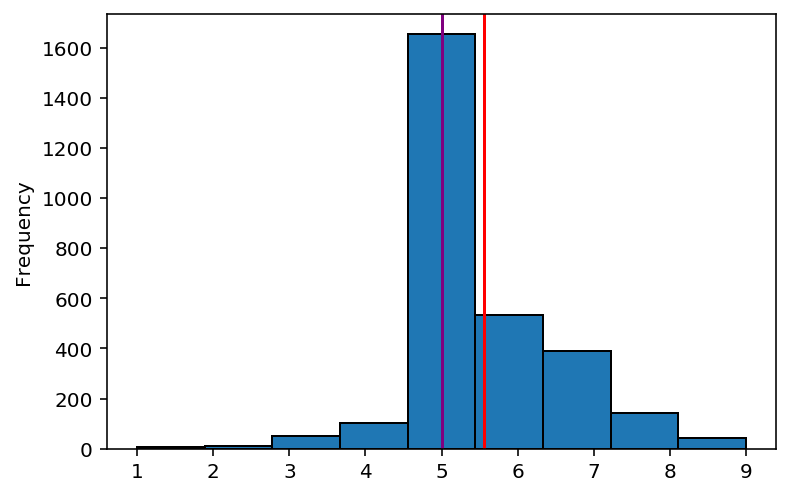

In [71]:
# plot histogram to visualize distribution
houses['Overall Cond'].plot.hist(edgecolor='black', bins=9)
plt.axvline(x=mean, color='red')
plt.axvline(x=median, color='purple');

In [73]:
# do you think the mean or median best describes the shape of the histogram?
more_representative = 'mean'

## _Sensitivity to Changes_

- can be argued that it's theoretically unsound to compute mean for ordinal variables
- truth is that in practice many people use the mean nonetheless
    - because in many cases it's much richer in information than median
- unlike the median, the mean is sensitive to small changes in data
    - this property is what makes it more useful in certain cases